1. Import NecessaryLibraries

In [ ]:
pip install inflection

In [ ]:
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# define a function to find the number and percentage of missing values in a dataframe
def get_missing_values_count_and_percentage(dataframe):
  num = 0
  for column in dataframe.columns:
    cnt = dataframe[column].isnull().mean()
    percentage = cnt*100
    if percentage > 0:
      num += 1
      print(f"Missing Values in {column}: {cnt}({round(percentage, 2)})%")
  if num == 0:
    print("No missing values in the dataframe")

In [ ]:

def cat_analysis(df, colnames, nrows=2, mcols=2, width=20, height=30, sortbyindex=False):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    fig.set_facecolor(color='peachpuff')

    fig.tight_layout(pad=6.0)  # Adjust the spacing between subplots

    for rows, colname in enumerate(colnames):
        count = (df[colname].value_counts(normalize=True) * 100)

        title = f"Frequency of {colname} (%)"
        if sortbyindex:
            count = count.sort_values()

        count.plot.bar(color=sns.color_palette("flare"), ax=ax[rows][0])
        ax[rows][0].set_ylabel(title, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)

        count.plot.pie(colors=sns.color_palette("flare"), autopct='%0.0f%%',
                       textprops={'fontsize': 14}, shadow=True, ax=ax[rows][1])

        title = f"Frequency wise {colname} ({min(count):.0f}% - {max(count):.0f}%)"
        ax[rows][0].set_title(title, fontweight="bold")

In [ ]:
def total_words(row):
    l1 = set(map(lambda word: word.lower().strip(), row['passage'].split(" ")))
    return (len(l1))
def total_words_questions(row):
    l1 = set(map(lambda word: word.lower().strip(), row['question'].split(" ")))
    return (len(l1))
def total_words_answers(row):
    l1 = set(map(lambda word: word.lower().strip(), row['answer'].split(" ")))
    return (len(l1))

In [ ]:
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0])
    ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})

    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

2. Read Data

In [ ]:
#df = pd.read_csv('/content/final_task2.csv', sep=',', na_values='\xa0', encoding='ISO-8859-1' )
df = pd.read_csv('/content/dicey_data_stage_1.csv', sep=',', na_values='\xa0', encoding='ISO-8859-1',  error_bad_lines=False)
#df = pd.read_csv('/content/dicey_data_stage_1.csv')

df.head()


Id  StudentId    Source PassageName Genre VocabularyAndLanguageComplexity  \
0  12          1  mocktest    bluebird  poem                             NaN   
1  32          1  mocktest    bluebird  poem                             NaN   
2  23          1  mocktest    bluebird  poem                             NaN   
3  27          7  mocktest    bluebird  poem                             NaN   
4  20         11  mocktest    bluebird  poem                             NaN   

  SentenceStructure ThemesAndContent Overall  QuestionID  ...  \
0               NaN              NaN     NaN           1  ...   
1               NaN              NaN     NaN           1  ...   
2               NaN              NaN     NaN           1  ...   
3               NaN              NaN     NaN           1  ...   
4               NaN              NaN     NaN           1  ...   

                        D    E  CorrectAnswer AnswerByStudent  \
0  Options 1,2 and 3 only  NaN              D               B   
1  Options 1,2 and 3 only  NaN              D               A   
2  Options 1,2 and 3 only  NaN              D               D   
3  Options 1,2 and 3 only  NaN              D               A   
4  Options 1,2 and 3 only  NaN              D               A   

       ExamDateTime ExamHour AttentionLevel StudentAge StudentGrade  \
0  06-03-2021 09:44        9              8        8.0            3   
1   5-31-22 9:16 AM        9              8        9.0            4   
2  06-03-2023 23:46       23              2       10.0            5   
3   5-31-22 9:17 AM        9              8        9.0            4   
4  06-03-2021 09:48        9              8       10.0            5   

                                      PassageContent  
0  Bluebird by Charles Bukowski  there's a bluebi...  
1  Bluebird by Charles Bukowski  there's a bluebi...  
2  Bluebird by Charles Bukowski  there's a bluebi...  
3  Bluebird by Charles Bukowski  there's a bluebi...  
4  Bluebird by Charles Bukowski  there's a bluebi...  

[5 rows x 27 columns]

# Data Description

## Rename Columns

In [ ]:
df1 = df.copy()

In [ ]:
cols_old = df1.columns.tolist()

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))


In [ ]:
df1.columns = cols_new
df1.columns

Index(['id', 'student_id', 'source', 'passage_name', 'genre',
       'vocabulary_and_language_complexity', 'sentence_structure',
       'themes_and_content', 'overall', 'question_id', 'question_text',
       'question_difficulty', 'question_type_id', 'question_type', 'a', 'b',
       'c', 'd', 'e', 'correct_answer', 'answer_by_student', 'exam_date_time',
       'exam_hour', 'attention_level', 'student_age', 'student_grade',
       'passage_content'],
      dtype='object')

## Data Inspection

In [ ]:
print("Number of genre ", len(df1["genre"].unique()))
print("Number of students: ", len(df1["student_id"].unique()))
print("Number of passage ", len(df1["passage_name"].unique()))
print("Number of question ", len(df1["question_id"].unique()))

Number of genre  7
Number of students:  87
Number of passage  69
Number of question  30


In [ ]:
df1.describe()

id    student_id   question_id  question_difficulty  \
count  11606.000000  11606.000000  11606.000000         11370.000000   
mean    5808.660090     29.206703     10.420731             4.174758   
std     3358.058724     22.584624      6.644455             0.966214   
min        1.000000      1.000000      1.000000             1.000000   
25%     2902.250000     12.000000      5.000000             4.000000   
50%     5803.500000     22.000000     10.000000             4.000000   
75%     8704.750000     41.000000     15.000000             5.000000   
max    11639.000000     91.000000     30.000000             5.000000   

       question_type_id   student_age  student_grade  
count      11606.000000  11210.000000   11606.000000  
mean           1.784336     11.248171       4.540927  
std            1.556274     13.815880       0.735278  
min            1.000000      7.000000       3.000000  
25%            1.000000      9.000000       4.000000  
50%            1.000000     10.000000       5.000000  
75%            2.000000     10.000000       5.000000  
max            6.000000    117.000000       6.000000

In [ ]:
# total number of rows in dataframe
num_of_rows = df1.shape[0]
print(f"Total no. of rows: {num_of_rows}")

# number of feature columns
num_of_features = df1.shape[1]
print(f"Total no. of Columns: {num_of_features}")

# number of duplicate rows
num_of_dup_rows = df1[df1.duplicated()].shape[0]
print(f"No. of duplicate rows: {num_of_dup_rows}")

# number of missing values per column in percentage
get_missing_values_count_and_percentage(df1)

Total no. of rows: 11606
Total no. of Columns: 27
No. of duplicate rows: 0
Missing Values in vocabulary_and_language_complexity: 0.10899534723418922(10.9)%
Missing Values in sentence_structure: 0.10899534723418922(10.9)%
Missing Values in themes_and_content: 0.10899534723418922(10.9)%
Missing Values in overall: 0.08960882302257453(8.96)%
Missing Values in question_text: 0.02309150439427882(2.31)%
Missing Values in question_difficulty: 0.020334309839738066(2.03)%
Missing Values in a: 0.02309150439427882(2.31)%
Missing Values in b: 0.02309150439427882(2.31)%
Missing Values in c: 0.023436153713596416(2.34)%
Missing Values in d: 0.02378080303291401(2.38)%
Missing Values in e: 0.8461140789246941(84.61)%
Missing Values in answer_by_student: 0.03722212648630019(3.72)%
Missing Values in exam_date_time: 0.0006031363088057901(0.06)%
Missing Values in student_age: 0.03412028261244184(3.41)%


In [ ]:
# Drop rows with null values in the "dob" or "examdate" columns
#df1.dropna(subset=['question','answer','coorectanswer', 'answerbystudent'], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11606 entries, 0 to 11605
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11606 non-null  int64  
 1   student_id                          11606 non-null  int64  
 2   source                              11606 non-null  object 
 3   passage_name                        11606 non-null  object 
 4   genre                               11606 non-null  object 
 5   vocabulary_and_language_complexity  10341 non-null  object 
 6   sentence_structure                  10341 non-null  object 
 7   themes_and_content                  10341 non-null  object 
 8   overall                             10566 non-null  object 
 9   question_id                         11606 non-null  int64  
 10  question_text                       11338 non-null  object 
 11  question_difficulty                 11370

In [ ]:
print("Source ", df1["source"] .unique())

Source  ['mocktest' 'worksheet']


In [ ]:

# List of columns with missing values
columns_with_missing = ['vocabulary_and_language_complexity', 'sentence_structure', 'themes_and_content', 'overall']

# Replace missing values with mode
for column in columns_with_missing:
    mode_value = df1[column].mode()[0]  # Calculate the mode of the column
    df1[column].fillna(mode_value, inplace=True)



In [ ]:
# Remove rows with missing values in 'question_text' column
df1.dropna(subset=['question_text'], inplace=True)

In [ ]:
mode_value = df1['question_difficulty'].mode()[0]  # Calculate the mode of the column
df1['question_difficulty'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = df1['student_age'].mode()[0]  # Calculate the mode of the column
df1['student_age'].fillna(mode_value, inplace=True)

In [ ]:
# number of missing values per column in percentage
get_missing_values_count_and_percentage(df1)

Missing Values in c: 0.0003527959075674722(0.04)%
Missing Values in d: 0.0007055918151349444(0.07)%
Missing Values in e: 0.8424766272711236(84.25)%
Missing Values in answer_by_student: 0.03748456517904392(3.75)%
Missing Values in exam_date_time: 0.0006173928382430764(0.06)%


In [ ]:
mode_value = df1['exam_date_time'].mode()[0]  # Calculate the mode of the column
df1['exam_date_time'].fillna(mode_value, inplace=True)

In [ ]:
# Impute 'Missing' where option e is not present
df1['answer_by_student'].fillna('NotAttended', inplace=True)
df1['e'].fillna('NotApplicable', inplace=True)

## Delete Duplicates

In [ ]:
# Drop duplicate rows based on all columns
df1 = df1.drop_duplicates()
df1.shape

(11338, 27)

## Handle Missing Values

In [ ]:
'''
from datetime import datetime
# Convert the "examdatetime" column to datetime format
df2['exam_date_time'] = pd.to_datetime(df2['exam_date_time'], errors='coerce')

# Check for any errors during the conversion to datetime
print("Conversion errors:")
print(df2[df2['exam_date_time'].isnull()]['exam_date_time'])

# Extract the date from the "examdatetime" column
df2['examdate'] = df2['exam_date_time'].dt.date

# Display the updated DataFrame with the new "examdate" column
print(df2.head())

# Save the updated DataFrame to a new CSV file (if needed)
#df2.to_csv('updated_data.csv', index=False)
'''

'\nfrom datetime import datetime\n# Convert the "examdatetime" column to datetime format\ndf2[\'exam_date_time\'] = pd.to_datetime(df2[\'exam_date_time\'], errors=\'coerce\')\n\n# Check for any errors during the conversion to datetime\nprint("Conversion errors:")\nprint(df2[df2[\'exam_date_time\'].isnull()][\'exam_date_time\'])\n\n# Extract the date from the "examdatetime" column\ndf2[\'examdate\'] = df2[\'exam_date_time\'].dt.date\n\n# Display the updated DataFrame with the new "examdate" column\nprint(df2.head())\n\n# Save the updated DataFrame to a new CSV file (if needed)\n#df2.to_csv(\'updated_data.csv\', index=False)\n'

In [ ]:
#df3=df2.copy()

In [ ]:
#df3.head()

In [ ]:
'''
# Convert the "dob" and "examdate" columns to datetime format
df3['dob'] = pd.to_datetime(df3['dob'], errors='coerce')
df3['examdate'] = pd.to_datetime(df3['examdate'], errors='coerce')

# Calculate the age by subtracting dob from examdate and extracting the years
df3['age'] = (df3['examdate'] - df3['dob']).dt.days // 365

# Display the updated DataFrame with the new "age" column
print(df3.head())

# Save the updated DataFrame to a new CSV file (if needed)
df3.to_csv('updated_data_with_age.csv', index=False)
'''

'\n# Convert the "dob" and "examdate" columns to datetime format\ndf3[\'dob\'] = pd.to_datetime(df3[\'dob\'], errors=\'coerce\')\ndf3[\'examdate\'] = pd.to_datetime(df3[\'examdate\'], errors=\'coerce\')\n\n# Calculate the age by subtracting dob from examdate and extracting the years\ndf3[\'age\'] = (df3[\'examdate\'] - df3[\'dob\']).dt.days // 365\n\n# Display the updated DataFrame with the new "age" column\nprint(df3.head())\n\n# Save the updated DataFrame to a new CSV file (if needed)\ndf3.to_csv(\'updated_data_with_age.csv\', index=False)\n'

In [ ]:
df1.columns

Index(['id', 'student_id', 'source', 'passage_name', 'genre',
       'vocabulary_and_language_complexity', 'sentence_structure',
       'themes_and_content', 'overall', 'question_id', 'question_text',
       'question_difficulty', 'question_type_id', 'question_type', 'a', 'b',
       'c', 'd', 'e', 'correct_answer', 'answer_by_student', 'exam_date_time',
       'exam_hour', 'attention_level', 'student_age', 'student_grade',
       'passage_content'],
      dtype='object')

In [ ]:
# Map 'source' values to 'time_bound' categories
source_to_time_bound = {
    'mocktest': 'in_time_bound',
    'worksheet': 'not_time_bound'
}

# Create a new column 'time_bound' based on the mapping
df1['time_bound'] = df1['source'].map(source_to_time_bound)


In [ ]:
# Group the data by student_id
student_group = df1.groupby('student_id')

# Define a function to calculate the correctness ratio
def calculate_correctness_ratio(student_data):
    correct_answers = (student_data['answer_by_student'] == student_data['correct_answer']).sum()
    total_answers = student_data['answer_by_student'].count()
    return correct_answers / total_answers

# Calculate the correctness ratio for each student
correctness_ratio_by_student = student_group.apply(calculate_correctness_ratio)

# Add the correctness_ratio_by_student as a new column in the original DataFrame
df1['correctness_ratio_by_student'] = df1['student_id'].map(correctness_ratio_by_student)


In [ ]:
# number of missing values per column in percentage
get_missing_values_count_and_percentage(df1)

Missing Values in c: 0.0003527959075674722(0.04)%
Missing Values in d: 0.0007055918151349444(0.07)%


In [ ]:
df1.columns

Index(['id', 'student_id', 'source', 'passage_name', 'genre',
       'vocabulary_and_language_complexity', 'sentence_structure',
       'themes_and_content', 'overall', 'question_id', 'question_text',
       'question_difficulty', 'question_type_id', 'question_type', 'a', 'b',
       'c', 'd', 'e', 'correct_answer', 'answer_by_student', 'exam_date_time',
       'exam_hour', 'attention_level', 'student_age', 'student_grade',
       'passage_content', 'time_bound', 'correctness_ratio_by_student'],
      dtype='object')

In [ ]:
df1.head()

id  student_id    source passage_name genre  \
0  12           1  mocktest     bluebird  poem   
1  32           1  mocktest     bluebird  poem   
2  23           1  mocktest     bluebird  poem   
3  27           7  mocktest     bluebird  poem   
4  20          11  mocktest     bluebird  poem   

  vocabulary_and_language_complexity sentence_structure themes_and_content  \
0                           Moderate           Moderate           Moderate   
1                           Moderate           Moderate           Moderate   
2                           Moderate           Moderate           Moderate   
3                           Moderate           Moderate           Moderate   
4                           Moderate           Moderate           Moderate   

    overall  question_id  ... correct_answer  answer_by_student  \
0  Moderate            1  ...              D                  B   
1  Moderate            1  ...              D                  A   
2  Moderate            1  ...              D                  D   
3  Moderate            1  ...              D                  A   
4  Moderate            1  ...              D                  A   

     exam_date_time exam_hour attention_level student_age student_grade  \
0  06-03-2021 09:44         9               8         8.0             3   
1   5-31-22 9:16 AM         9               8         9.0             4   
2  06-03-2023 23:46        23               2        10.0             5   
3   5-31-22 9:17 AM         9               8         9.0             4   
4  06-03-2021 09:48         9               8        10.0             5   

                                     passage_content     time_bound  \
0  Bluebird by Charles Bukowski  there's a bluebi...  in_time_bound   
1  Bluebird by Charles Bukowski  there's a bluebi...  in_time_bound   
2  Bluebird by Charles Bukowski  there's a bluebi...  in_time_bound   
3  Bluebird by Charles Bukowski  there's a bluebi...  in_time_bound   
4  Bluebird by Charles Bukowski  there's a bluebi...  in_time_bound   

  correctness_ratio_by_student  
0                     0.549884  
1                     0.549884  
2                     0.549884  
3                     0.349206  
4                     0.552764  

[5 rows x 29 columns]

In [ ]:
# Drop unnecessary rows
#df1.dropna(subset=['question','answer','coorectanswer', 'answerbystudent'], inplace=True)

In [ ]:
# Drop unnecessary columns passage_name, question_id, 'a', 'b', 'c', 'd', 'e', 'correct_answer', 'answer_by_student',
df1.drop(columns=['source','passage_name','question_id', 'a', 'b', 'c', 'd', 'e',  'exam_date_time'], inplace=True)

In [ ]:
df1.columns

Index(['id', 'student_id', 'genre', 'vocabulary_and_language_complexity',
       'sentence_structure', 'themes_and_content', 'overall', 'question_text',
       'question_difficulty', 'question_type_id', 'question_type',
       'correct_answer', 'answer_by_student', 'exam_hour', 'attention_level',
       'student_age', 'student_grade', 'passage_content', 'time_bound',
       'correctness_ratio_by_student'],
      dtype='object')

# Data type conversion

In [ ]:
df2=df1.copy()

In [ ]:
df2['question_difficulty'] = df2['question_difficulty'].astype(int)
df2['student_age'] = df2['student_age'].astype(int)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11338 entries, 0 to 11605
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11338 non-null  int64  
 1   student_id                          11338 non-null  int64  
 2   genre                               11338 non-null  object 
 3   vocabulary_and_language_complexity  11338 non-null  object 
 4   sentence_structure                  11338 non-null  object 
 5   themes_and_content                  11338 non-null  object 
 6   overall                             11338 non-null  object 
 7   question_text                       11338 non-null  object 
 8   question_difficulty                 11338 non-null  int64  
 9   question_type_id                    11338 non-null  int64  
 10  question_type                       11338 non-null  object 
 11  correct_answer                      11338

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['genre', 'question_difficulty', 'question_type', 'exam_hour']:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11338 entries, 0 to 11605
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11338 non-null  int64  
 1   student_id                          11338 non-null  int64  
 2   genre                               11338 non-null  int64  
 3   vocabulary_and_language_complexity  11338 non-null  object 
 4   sentence_structure                  11338 non-null  object 
 5   themes_and_content                  11338 non-null  object 
 6   overall                             11338 non-null  object 
 7   question_text                       11338 non-null  object 
 8   question_difficulty                 11338 non-null  int64  
 9   question_type_id                    11338 non-null  int64  
 10  question_type                       11338 non-null  int64  
 11  correct_answer                      11338

# Descriptive Statistics

In [ ]:
num_attributes = df2.select_dtypes(include=["int64", "float64","uint8"])
cat_attributes = df2.select_dtypes(exclude=["int64", "uint8","float64", "datetime64[ns]"])

## Numerical Attributes

In [ ]:
num_attributes

id  student_id  genre  question_difficulty  question_type_id  \
0         12           1      5                    2                 2   
1         32           1      5                    2                 2   
2         23           1      5                    2                 2   
3         27           7      5                    2                 2   
4         20          11      5                    2                 2   
...      ...         ...    ...                  ...               ...   
11601  11634           5      0                    1                 1   
11602  11635           8      0                    1                 1   
11603  11636          12      0                    1                 1   
11604  11639          21      0                    1                 1   
11605  11638          24      0                    1                 1   

       question_type  exam_hour  student_age  student_grade  \
0                  1         16            8              3   
1                  1         16            9              4   
2                  1         14           10              5   
3                  1         16            9              4   
4                  1         16           10              5   
...              ...        ...          ...            ...   
11601              2          1            9              4   
11602              2          1            9              4   
11603              2          1            8              3   
11604              2          1            9              4   
11605              2          1            9              4   

       correctness_ratio_by_student  
0                          0.549884  
1                          0.549884  
2                          0.549884  
3                          0.349206  
4                          0.552764  
...                             ...  
11601                      0.481752  
11602                      0.540260  
11603                      0.557292  
11604                      0.565684  
11605                      0.283951  

[11338 rows x 10 columns]

In [ ]:
cat_attributes

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

In [ ]:
m

In [ ]:
num_attributes.columns

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

In [ ]:
cat_attributes.columns
selected_columns = ['vocabulary_and_language_complexity', 'sentence_structure', 'themes_and_content', 'overall', 'attention_level', 'time_bound']
cat_col_analyses = cat_attributes[selected_columns]


In [ ]:
len(cat_col_analyses .columns)

# EDA

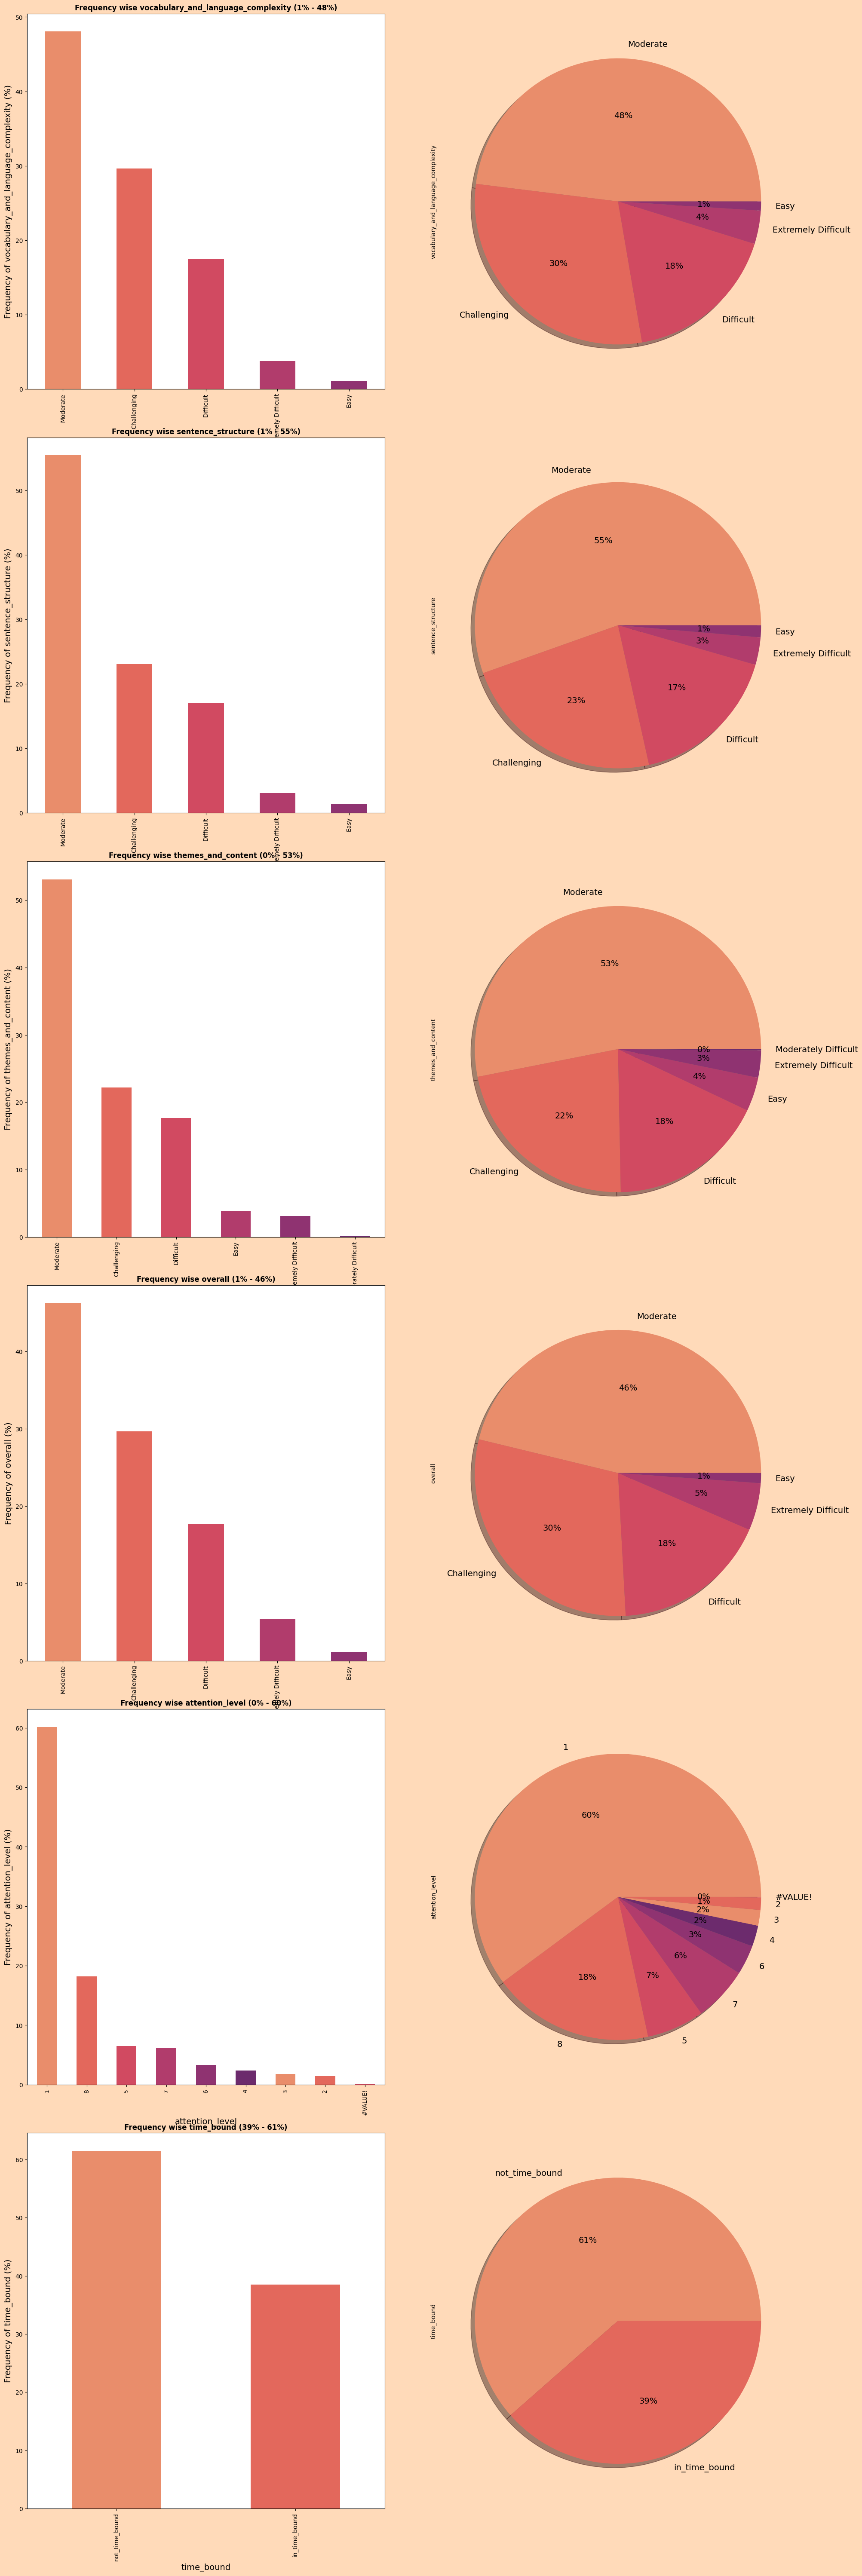

In [ ]:


# Call the cat_analysis function with adjusted nrows and mcols
cat_analysis(df2, cat_col_analyses[1:6], nrows=6, mcols=2, width=20, height=60)



In [ ]:
df3=df2.copy()

In [ ]:
# Save the updated DataFrame to a new CSV file (if needed)
df3.to_csv('dicey_data_stage_2.csv', index=False)

In [ ]:
sns.displot(df3["student_grade"], kde=True);

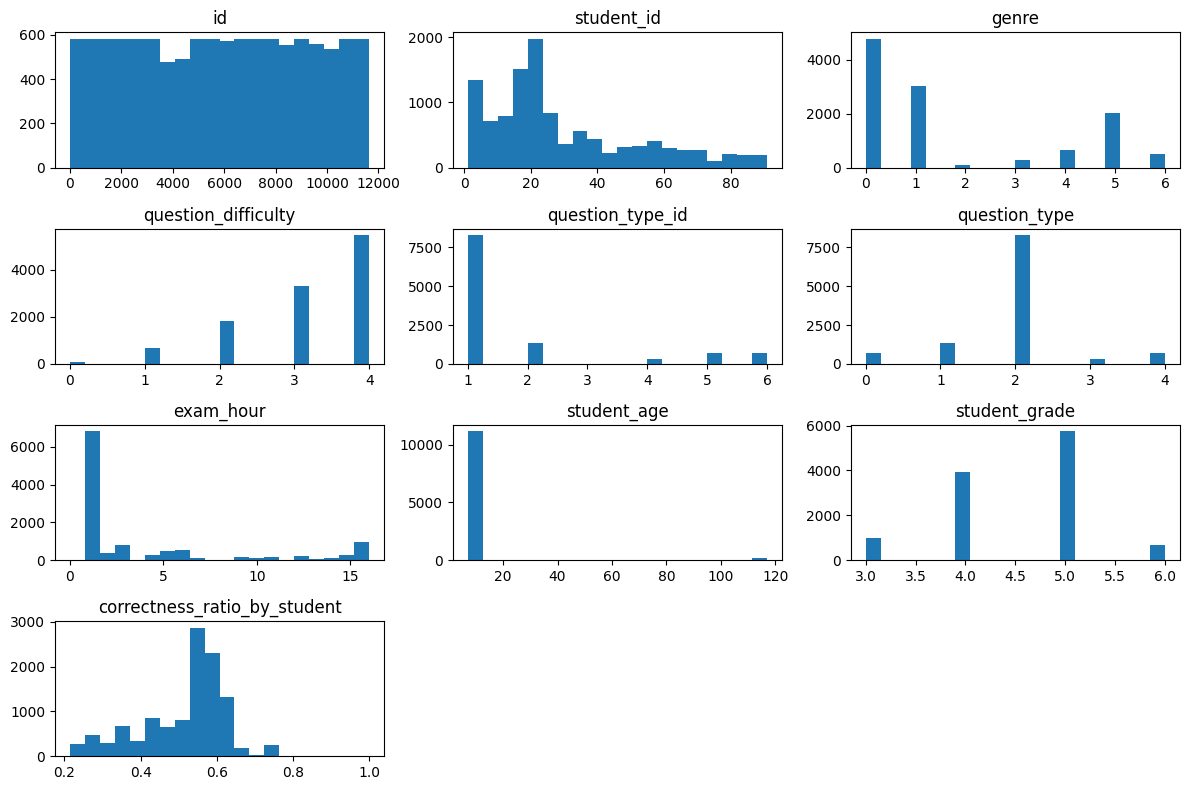

In [ ]:
# Plotting histograms of numerical attributes
num_attributes.hist(figsize=(12, 8), bins=20, grid=False)
# Adjusting the layout
plt.tight_layout()
# Displaying the histograms
plt.show()

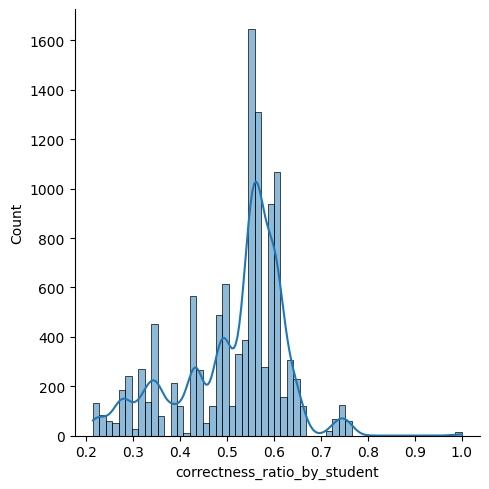

In [ ]:
sns.displot(df3["correctness_ratio_by_student"], kde=True);

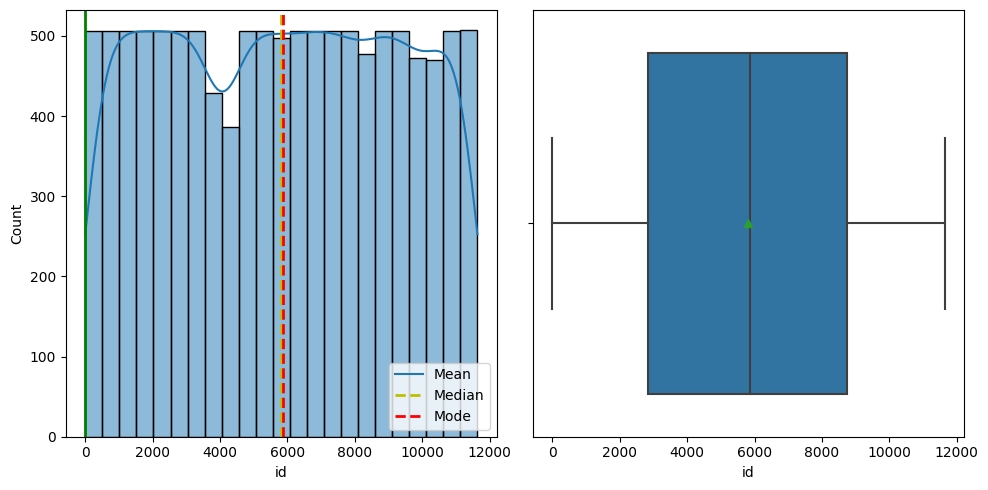

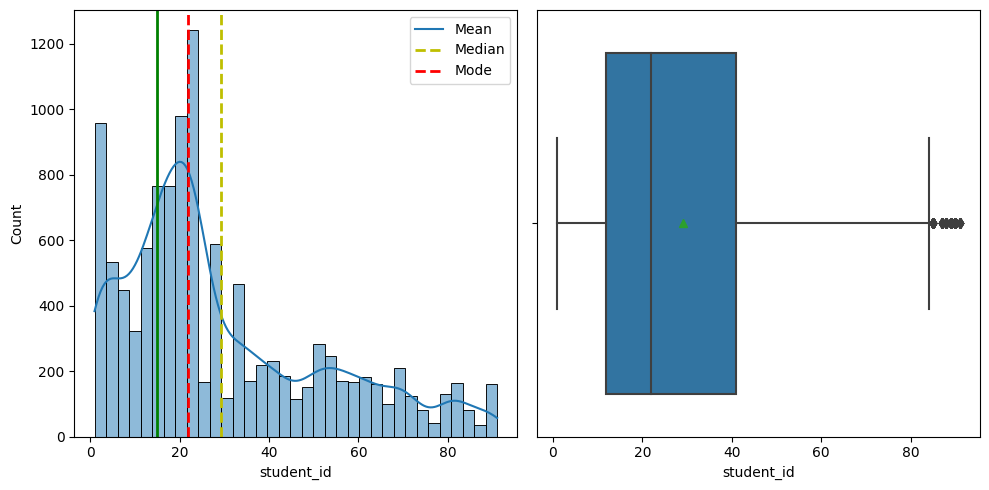

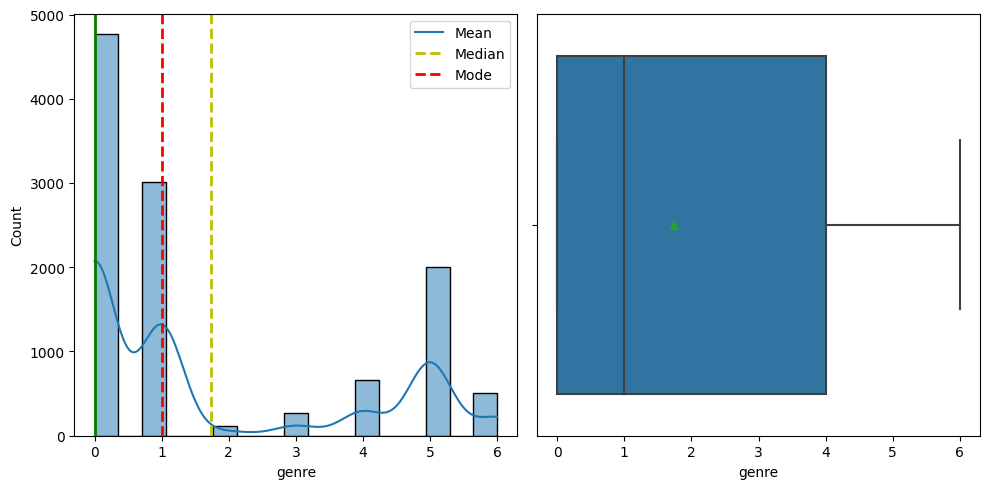

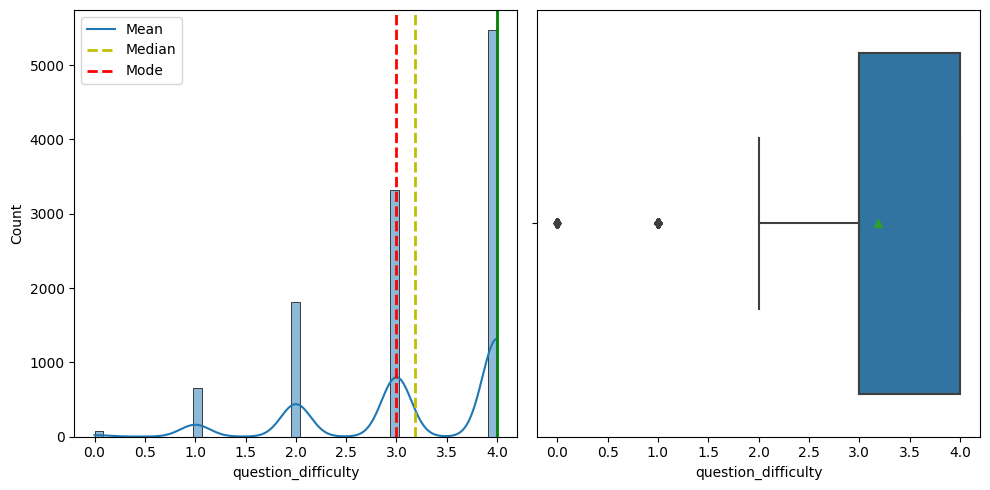

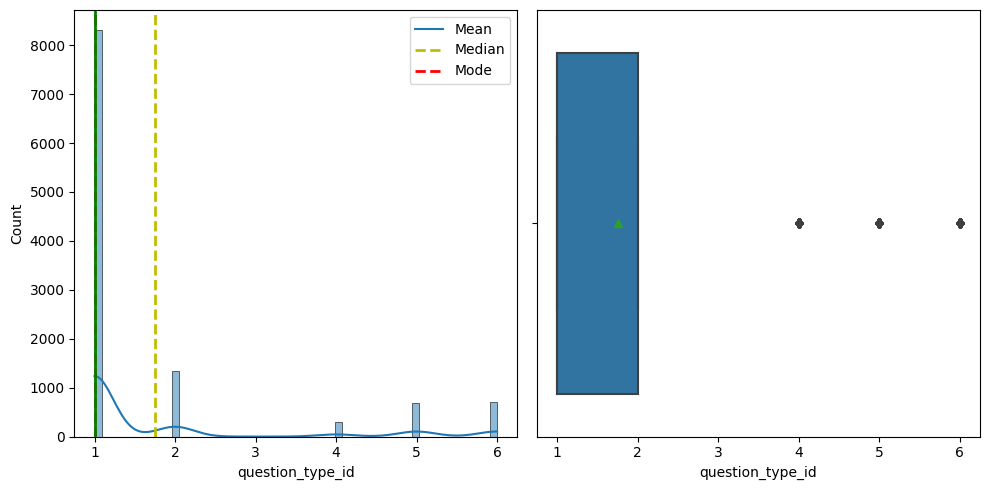

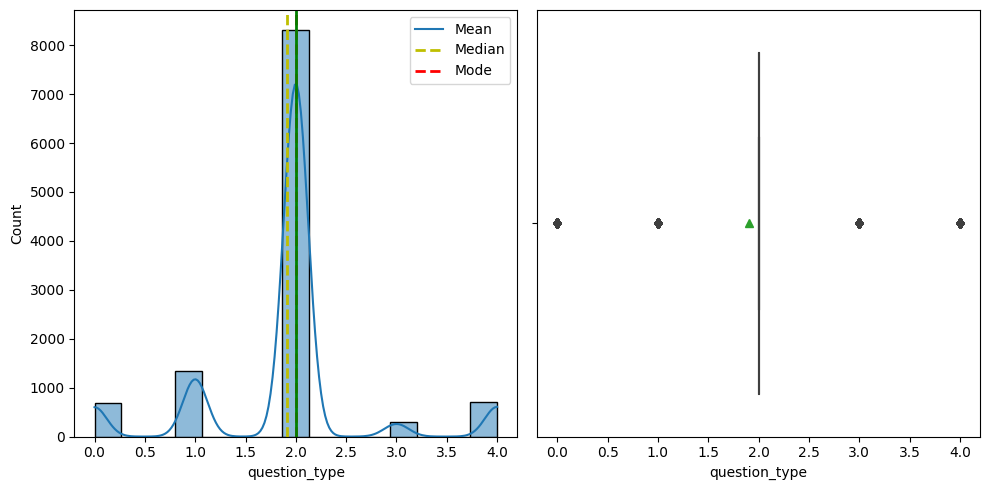

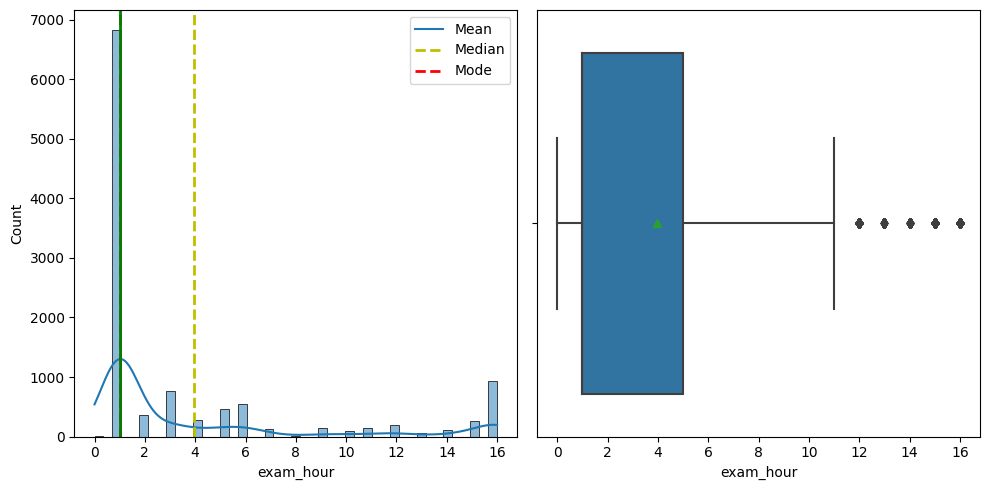

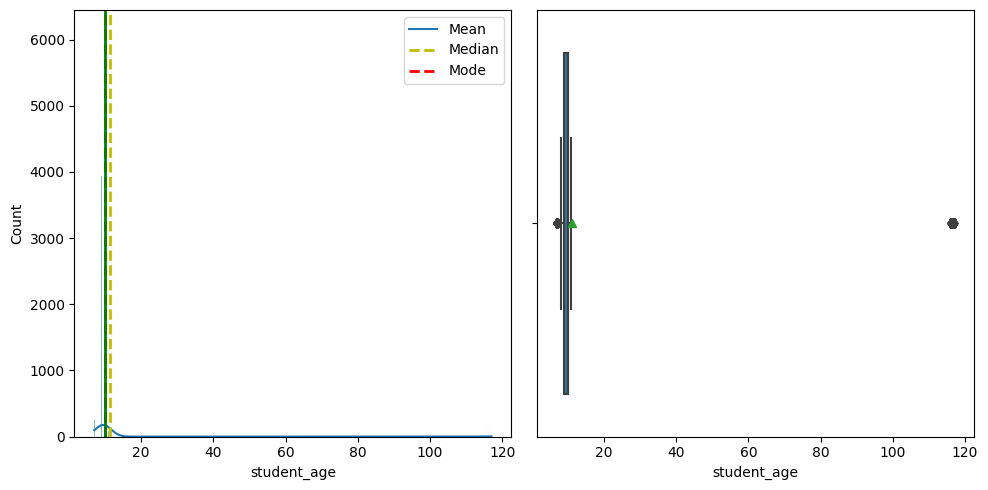

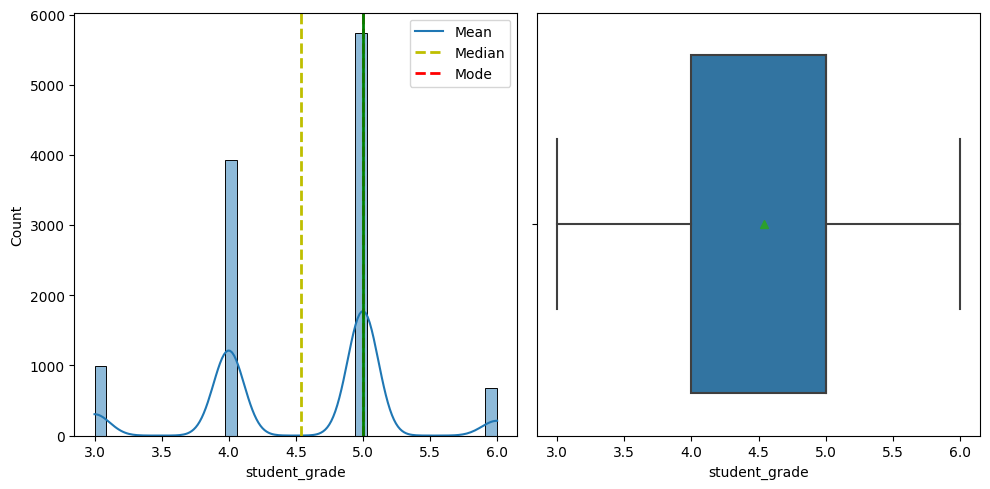

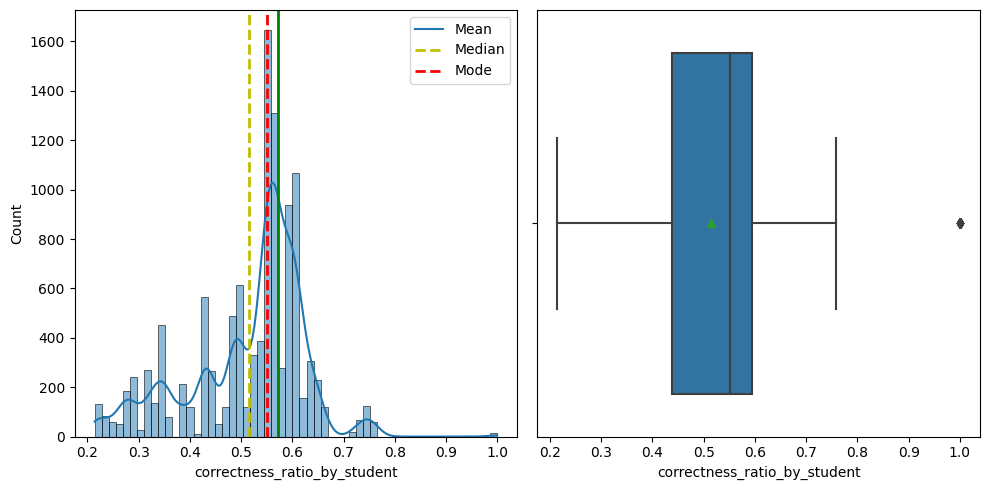

In [ ]:
for i in num_attributes.columns:
    num_feat(df3[i])

## Categorical Variables

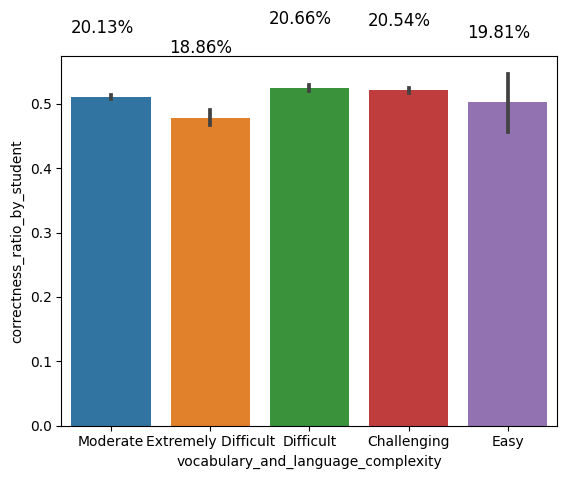

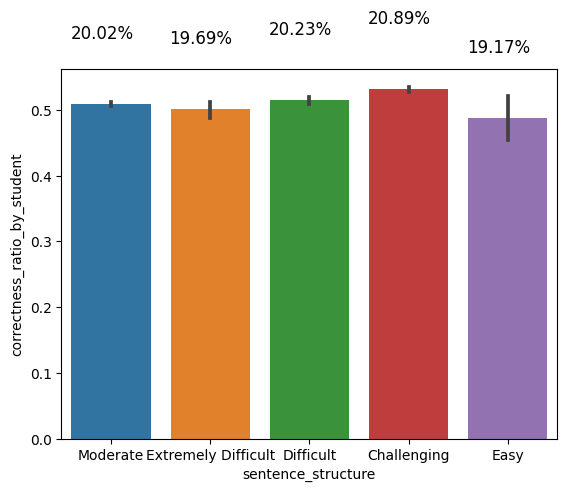

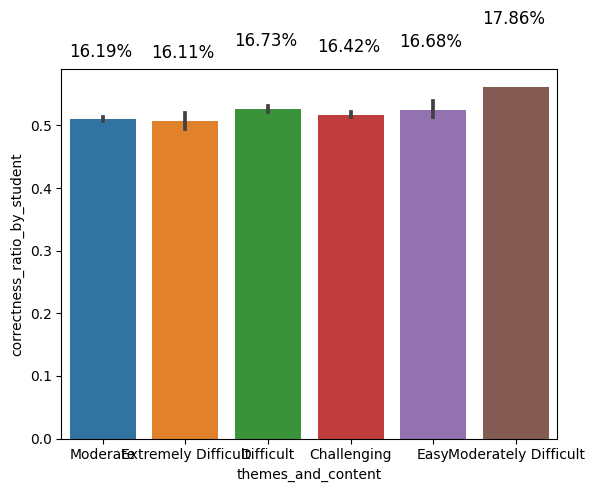

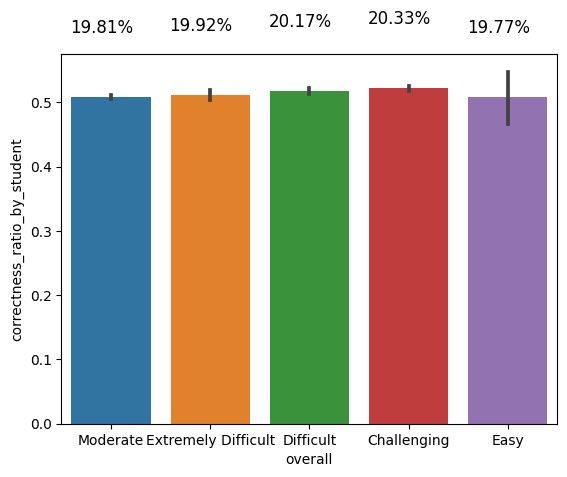

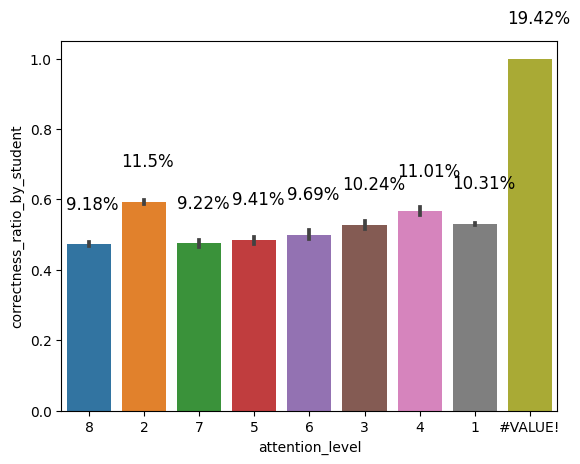

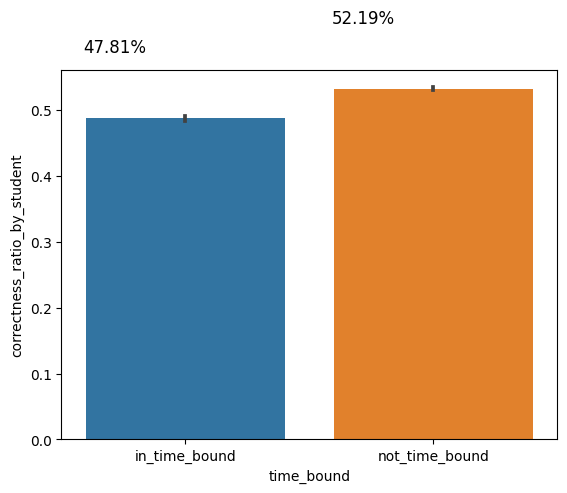

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
for value in cat_col_analyses:
  ax = sns.barplot(x=df3[value], y=df3['correctness_ratio_by_student'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .1, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()